# Project Journal

**Name:** Shiming Yin

**Research Question:**  Does the increase in clean energy consumption significantly reduce traditional fossil fuel energy consumption in the US and globally? Tests will be done based on US data and global data separately to compare if the tests on the two scales of models would show similar variable impact on target response. 

**Variables:**

$Y$ : Fossil Fuel Energy Consumption (Coal, Oil, or Natural Gas Consumption)

$X_1$: Solar Energy Consumption 

$X_2$: Wind Energy Consumption

$X_3$: Hydroelectic Energy Consumption 

$X_4$: Geothermal Energy Consumption

$X_5$: Wood Energy Consumption

$X_6$: Biomass Energy Consumption

$X_7$: Nuclear Energy Consumption


## Data Prep & EDA
**Dates:** November 1 - November 7

**Meeting Date:** November 7

### Data Cleaning Summary

**Summary of data cleaning process:**

1. Load the Dataset
Import the CSV file containing nuclear energy data.

2. Filter by Time
Include only rows where the YYYYMM column is greater than or equal to 200901.

3. Exclude Yearly Totals
Remove rows where the YYYYMM column ends with "13", as these represent yearly total values.

4. Filter by Description
Retain only rows where the Description column correpsponding to commercial and residential.

5. Exclude Invalid Values
Exclude rows where the Value column contains "Not Available".

6. Convert Values to Numeric
Convert the Value column from a string to a numeric type for analysis.

7. Extract Results
Save the filtered

**Issues Encountered and Resolutions:**
Remove the old year date


In [64]:
# Load the necessary library
library(dplyr)

# Load the CSV file
file_path <- "/Users/simonyin/Desktop/courses/2024Fall/STAT512/Github/Renewable-Energy-Project/data/Petroleum consumption by sector Residential and commercial sectors.csv"  # Replace with your actual file path
data <- read.csv(file_path)

# Step 1: Filter rows where YYYYMM >= 200901, does not end with "13," and where "Value" is not "Not Available"
filtered_data <- data %>%
  filter(
    as.numeric(YYYYMM) >= 200901,  # Include only data from 200901 onwards
    !grepl("13$", as.character(YYYYMM)),  # Exclude rows where YYYYMM ends with "13"
    !grepl("Not Available", Value)  # Exclude rows where Value is "Not Available"
  ) %>%
  mutate(Value = suppressWarnings(as.numeric(Value)))  # Safely convert "Value" to numeric

# Step 2: Combine Residential and Commercial sections for each energy type and time
summed_data <- filtered_data %>%
  group_by(YYYYMM, Description) %>%
  summarise(Total_Value = sum(Value, na.rm = TRUE), .groups = "drop")  # Sum Residential and Commercial sections

# Step 3: Save time-series values for each energy type as separate variables
# Create a list to store the time-series variables
energy_variables <- list()

# Loop through each unique energy type
for (energy in unique(summed_data$Description)) {
  # Filter the data for the current energy type
  energy_data <- summed_data %>%
    filter(Description == energy) %>%
    arrange(YYYYMM)  # Ensure the data is sorted by time

  # Save the time-series values as a variable
  assign(paste0("YK", which(unique(summed_data$Description) == energy)),
         energy_data$Total_Value)

  # Optionally store in a list for easier reference later
  energy_variables[[energy]] <- energy_data$Total_Value
}

# Step 4: Save the filtered time vector (from 200901 onward)
time_vector <- summed_data %>%
  filter(as.numeric(YYYYMM) >= 200901) %>%
  select(YYYYMM) %>%
  distinct() %>%
  arrange(YYYYMM) %>%
  pull()

Y1 <- YK10+YK11



In [60]:
# Load the CSV file
file_path <- "/Users/simonyin/Desktop/courses/2024Fall/STAT512/Github/Renewable-Energy-Project/data/Coal Consumption by sector.csv"  # Replace with your actual file path
data <- read.csv(file_path)


# Step 1: Filter rows where YYYYMM >= 200901, does not end with "13," and where "Value" is not "Not Available"
filtered_data <- data %>%
  filter(
    as.numeric(YYYYMM) >= 200901,  # Include only data from 200901 onwards
    !grepl("13$", as.character(YYYYMM)),  # Exclude rows where YYYYMM ends with "13"
    !grepl("Not Available", Value)  # Exclude rows where Value is "Not Available"
  ) %>%
  mutate(Value = suppressWarnings(as.numeric(Value)))  # Safely convert "Value" to numeric

# Step 2: Combine Residential and Commercial sections for each energy type and time
summed_data <- filtered_data %>%
  group_by(YYYYMM, Description) %>%
  summarise(Total_Value = sum(Value, na.rm = TRUE), .groups = "drop")  # Sum Residential and Commercial sections

# Step 3: Save time-series values for each energy type as separate variables
# Create a list to store the time-series variables
energy_variables <- list()

# Loop through each unique energy type
for (energy in unique(summed_data$Description)) {
  # Filter the data for the current energy type
  energy_data <- summed_data %>%
    filter(Description == energy) %>%
    arrange(YYYYMM)  # Ensure the data is sorted by time

  # Save the time-series values as a variable
  assign(paste0("YK", which(unique(summed_data$Description) == energy)),
         energy_data$Total_Value)

  # Optionally store in a list for easier reference later
  energy_variables[[energy]] <- energy_data$Total_Value
}

# Step 4: Save the filtered time vector (from 200901 onward)
time_vector <- summed_data %>%
  filter(as.numeric(YYYYMM) >= 200901) %>%
  select(YYYYMM) %>%
  distinct() %>%
  arrange(YYYYMM) %>%
  pull()

Y2 <- YK11

In [56]:

# Load the CSV file
file_path <- "/Users/simonyin/Desktop/courses/2024Fall/STAT512/Github/Renewable-Energy-Project/data/Natural Gas Consumption by sector.csv"  # Replace with your actual file path
data <- read.csv(file_path)


# Step 1: Filter rows where YYYYMM >= 200901, does not end with "13," and where "Value" is not "Not Available"
filtered_data <- data %>%
  filter(
    as.numeric(YYYYMM) >= 200901,  # Include only data from 200901 onwards
    !grepl("13$", as.character(YYYYMM)),  # Exclude rows where YYYYMM ends with "13"
    !grepl("Not Available", Value)  # Exclude rows where Value is "Not Available"
  ) %>%
  mutate(Value = suppressWarnings(as.numeric(Value)))  # Safely convert "Value" to numeric

# Step 2: Combine Residential and Commercial sections for each energy type and time
summed_data <- filtered_data %>%
  group_by(YYYYMM, Description) %>%
  summarise(Total_Value = sum(Value, na.rm = TRUE), .groups = "drop")  # Sum Residential and Commercial sections

# Step 3: Save time-series values for each energy type as separate variables
# Create a list to store the time-series variables
energy_variables <- list()

# Loop through each unique energy type
for (energy in unique(summed_data$Description)) {
  # Filter the data for the current energy type
  energy_data <- summed_data %>%
    filter(Description == energy) %>%
    arrange(YYYYMM)  # Ensure the data is sorted by time

  # Save the time-series values as a variable
  assign(paste0("YK", which(unique(summed_data$Description) == energy)),
         energy_data$Total_Value)

  # Optionally store in a list for easier reference later
  energy_variables[[energy]] <- energy_data$Total_Value
}

# Step 4: Save the filtered time vector (from 200901 onward)
time_vector <- summed_data %>%
  filter(as.numeric(YYYYMM) >= 200901) %>%
  select(YYYYMM) %>%
  distinct() %>%
  arrange(YYYYMM) %>%
  pull()

Y3 <- YK1+YK8


In [28]:
# Load the CSV file
file_path <- "/Users/simonyin/Desktop/courses/2024Fall/STAT512/Github/Renewable-Energy-Project/data/Renewable energy Consumption residential and commercial sectors.csv"  # Replace with your actual file path
data <- read.csv(file_path, stringsAsFactors = FALSE)


# Step 1: Filter rows where YYYYMM >= 200901, does not end with "13," and where "Value" is not "Not Available"
filtered_data <- data %>%
  filter(
    as.numeric(YYYYMM) >= 200901,  # Include only data from 200901 onwards
    !grepl("13$", as.character(YYYYMM)),  # Exclude rows where YYYYMM ends with "13"
    !grepl("Not Available", Value)  # Exclude rows where Value is "Not Available"
  ) %>%
  mutate(Value = suppressWarnings(as.numeric(Value)))  # Safely convert "Value" to numeric

# Step 2: Combine Residential and Commercial sections for each energy type and time
summed_data <- filtered_data %>%
  group_by(YYYYMM, Description) %>%
  summarise(Total_Value = sum(Value, na.rm = TRUE), .groups = "drop")  # Sum Residential and Commercial sections

# Step 3: Save time-series values for each energy type as separate variables
# Create a list to store the time-series variables
energy_variables <- list()

# Loop through each unique energy type
for (energy in unique(summed_data$Description)) {
  # Filter the data for the current energy type
  energy_data <- summed_data %>%
    filter(Description == energy) %>%
    arrange(YYYYMM)  # Ensure the data is sorted by time

  # Save the time-series values as a variable
  assign(paste0("K", which(unique(summed_data$Description) == energy)),
         energy_data$Total_Value)

  # Optionally store in a list for easier reference later
  energy_variables[[energy]] <- energy_data$Total_Value
}

# Step 4: Save the filtered time vector (from 200901 onward)
time_vector <- summed_data %>%
  filter(as.numeric(YYYYMM) >= 200901) %>%
  select(YYYYMM) %>%
  distinct() %>%
  arrange(YYYYMM) %>%
  pull()


In [40]:
# Load the CSV file
file_path <- "/Users/simonyin/Desktop/courses/2024Fall/STAT512/Github/Renewable-Energy-Project/data/Nuclear Energy.csv"  # Replace with your actual file path
data <- read.csv(file_path, stringsAsFactors = FALSE)

# Filter the data
filtered_data <- data %>%
  filter(
    as.numeric(YYYYMM) >= 200901,  # Include only rows starting from 200901
    !grepl("13$", as.character(YYYYMM)),  # Exclude rows where YYYYMM ends with "13"
    Description == "Nuclear Generating Units, Net Summer Capacity",  # Filter by the required Description
    Value != "Not Available"  # Exclude rows where Value is "Not Available"
  ) %>%
  mutate(Value = as.numeric(Value))  # Convert Value column to numeric

# Save the filtered "Value" column as Y_filtered
X7 <- filtered_data %>%
  pull(Value)  # Extract the "Value" column as a vector

# Save the corresponding "YYYYMM" column as t_filtered
t_X7 <- filtered_data %>%
  pull(YYYYMM)  # Extract the "YYYYMM" column as a vector



In [86]:
Y  <- Y1+Y2+Y3
X1 <- K10+K11
X2 <- K12+K13
X3 <- K9
X4 <- K7+K8
X5 <- K4+K5
X6 <- K1
X7 <- X7

# Combine all variables into a data frame
data <- data.frame(
  Y = Y,
  X1 = X1,
  X2 = X2,
  X3 = X3,
  X4 = X4,
  X5 = X5,
  X6 = X6,
  X7 = X7
)


### Exploratory Data Analysis Findings
**Key Visualizations:** 

[1] "Significant Correlations (|correlation| > 0.5):"
   Variable1 Variable2 Correlation
1         X2         Y   0.5947015
2         X4         Y  -0.7815791
3         X6         Y  -0.7054278
4         X7         Y   0.7781887
5         X4        X1   0.7147372
6         X6        X1   0.8297108
7         X7        X1  -0.6336816
8         X3        X2   0.5838289
9         X7        X2   0.5222030
10        X6        X4   0.8717797
11        X7        X4  -0.8378497
12        X7        X6  -0.8103414


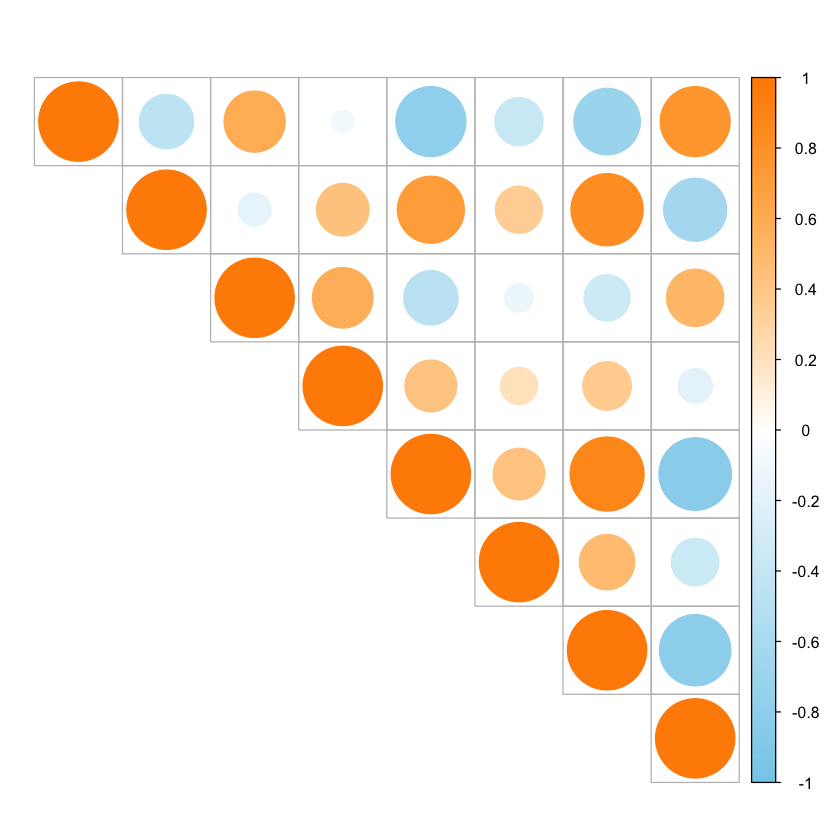

In [ ]:
library(corrplot)


# Compute the correlation matrix
cor_matrix <- cor(data, use = "complete.obs")

# Visualize the correlation matrix using corrplot
# Plot the entire correlation matrix
corrplot(
  cor_matrix,
  method = "circle",
  type = "upper",
  col = colorRampPalette(c("skyblue", "white", "darkorange"))(200),
  tl.cex = 0.8,           # Text label size
  tl.col = "white",       # Label color
  cl.cex = 0.8            # Color legend size
)

# Use the lower triangle to avoid duplicate pairs
significant_pairs <- which(abs(cor_matrix) > 0.5 & lower.tri(cor_matrix, diag = FALSE), arr.ind = TRUE)

# Create a data frame of significant correlations
significant_correlations <- data.frame(
  Variable1 = rownames(cor_matrix)[significant_pairs[, 1]],
  Variable2 = colnames(cor_matrix)[significant_pairs[, 2]],
  Correlation = cor_matrix[significant_pairs]
)

# Print the significant correlations
print("Significant Correlations (|correlation| > 0.5):")
print(significant_correlations)

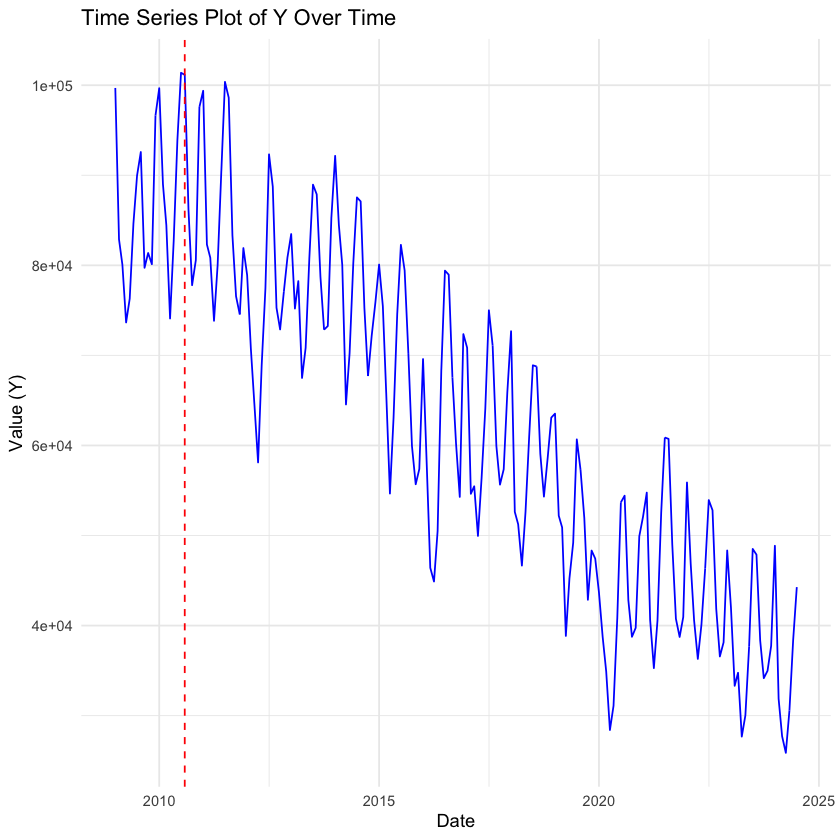

In [76]:
library(ggplot2)
library(lubridate)

# Combine the time and value into a data frame
time_series_data <- data.frame(
  Date = as.Date(paste0(t_Y2, "01"), format = "%Y%m%d"),  # Convert YYYYMM to Date
  Value = Y  # Use Y as the value to be plotted
)

# Create a time series plot
ggplot(time_series_data, aes(x = Date, y = Value)) +
  geom_line(color = "blue") +  # Line plot of the time series
  geom_vline(xintercept = as.Date("2010-08-01"), linetype = "dashed", color = "red") +  # Example event date
  labs(title = "Time Series Plot of Y Over Time",
       y = "Value (Y)",
       x = "Date") +
  theme_minimal()

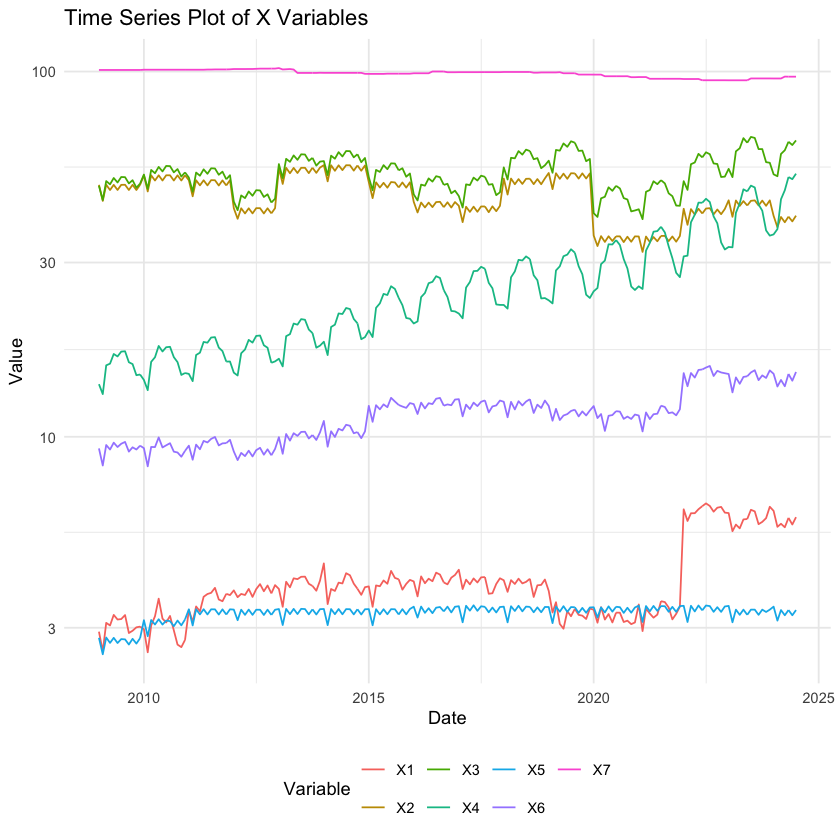

In [81]:
library(tidyr)
# Combine the time and all variables (X1, X2, ..., X7) into a long format for ggplot
time_series_data <- data.frame(
  Date = as.Date(paste0(t_Y2, "01"), format = "%Y%m%d"),  # Convert YYYYMM to Date
  X1 = X1,
  X2 = X2,
  X3 = X3,
  X4 = X4,
  X5 = X5,
  X6 = X6,
  X7 = X7
) %>%
  pivot_longer(cols = starts_with("X"), names_to = "Variable", values_to = "Value")  # Convert to long format

# Plot all time series in one figure
ggplot(time_series_data, aes(x = Date, y = Value, color = Variable)) +
  geom_line() +  # Line plot for each variable
  scale_y_log10() +  # Apply log scale to y-axis
  labs(title = "Time Series Plot of X Variables",
       y = "Value",
       x = "Date",
       color = "Variable") +  # Add legend for variables
  theme_minimal() +
  theme(legend.position = "bottom")  # Move legend to bottom

`geom_smooth()` using formula = 'y ~ x'


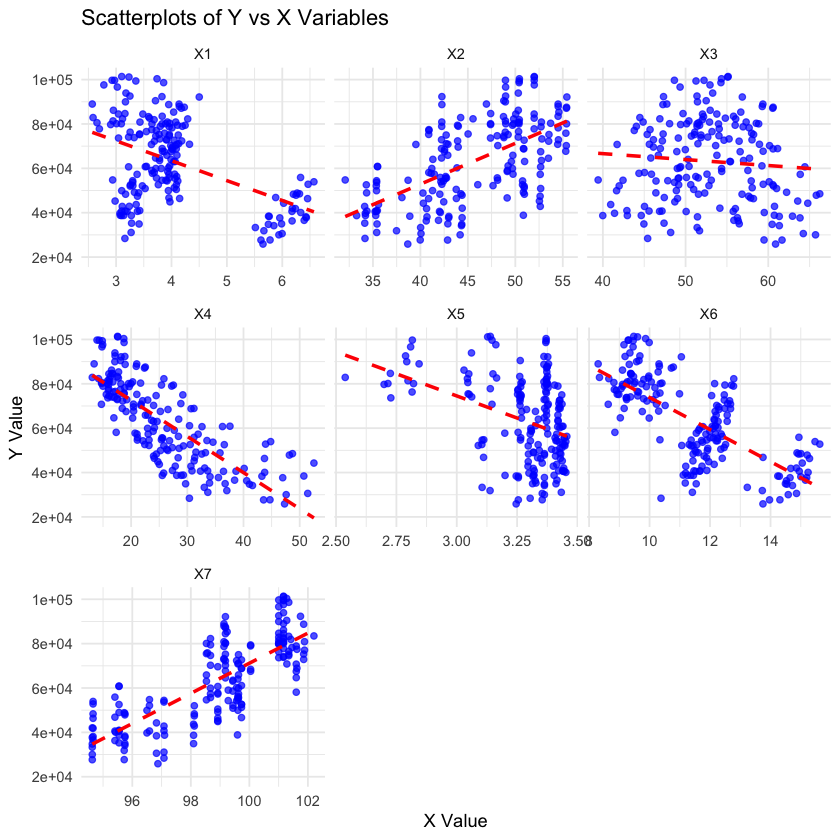

In [82]:
# Combine Y and all X variables into a long format for ggplot
scatter_data <- data.frame(
  Y = Y,
  X1 = X1,
  X2 = X2,
  X3 = X3,
  X4 = X4,
  X5 = X5,
  X6 = X6,
  X7 = X7
) %>%
  pivot_longer(cols = starts_with("X"), names_to = "Variable", values_to = "X_Value")  # Convert to long format

# Create scatterplots of each X variable against Y
ggplot(scatter_data, aes(x = X_Value, y = Y)) +
  geom_point(alpha = 0.7, color = "blue") +  # Scatterplot points
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "dashed") +  # Add regression line
  facet_wrap(~Variable, scales = "free_x") +  # Create a separate plot for each X variable
  labs(title = "Scatterplots of Y vs X Variables",
       x = "X Value",
       y = "Y Value") +
  theme_minimal()

### Summary Statistics

In [85]:
library(dplyr)
library(knitr)

# Calculate summary statistics for each variable
summary_stats <- data %>%
  summarise(
    Y_mean = mean(Y, na.rm = TRUE),
    Y_sd = sd(Y, na.rm = TRUE),
    X1_mean = mean(X1, na.rm = TRUE),
    X1_sd = sd(X1, na.rm = TRUE),
    X2_mean = mean(X2, na.rm = TRUE),
    X2_sd = sd(X2, na.rm = TRUE),
    X3_mean = mean(X3, na.rm = TRUE),
    X3_sd = sd(X3, na.rm = TRUE),
    X4_mean = mean(X4, na.rm = TRUE),
    X4_sd = sd(X4, na.rm = TRUE),
    X5_mean = mean(X5, na.rm = TRUE),
    X5_sd = sd(X5, na.rm = TRUE),
    X6_mean = mean(X6, na.rm = TRUE),
    X6_sd = sd(X6, na.rm = TRUE),
    X7_mean = mean(X7, na.rm = TRUE),
    X7_sd = sd(X7, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = everything(), 
               names_to = "Statistic", 
               values_to = "Value")  # Reshape for readability

# Display the summary statistics as a formatted table
kable(summary_stats, caption = "Summary Statistics for Y and X Variables", digits = 2)



Table: Summary Statistics for Y and X Variables

|Statistic |    Value|
|:---------|--------:|
|Y_mean    | 63179.04|
|Y_sd      | 19157.48|
|X1_mean   |     4.03|
|X1_sd     |     1.00|
|X2_mean   |    45.61|
|X2_sd     |     6.19|
|X3_mean   |    52.86|
|X3_sd     |     5.99|
|X4_mean   |    25.76|
|X4_sd     |     9.18|
|X5_mean   |     3.28|
|X5_sd     |     0.18|
|X6_mean   |    11.47|
|X6_sd     |     1.87|
|X7_mean   |    98.82|
|X7_sd     |     2.19|

***
## Model Building
**Dates:** November 8 - November 14

**Meeting Date:** November 14

### Model Equation

**Equation:** 
$$Y = \beta_0 +  \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6 + \beta_7X_7 + \epsilon
\newline


### Model Fitting

In [87]:
# Model fitting code 
# Build the linear regression model
base_model <- lm(Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7, data = data)

# Summarize the model to assess its fit
summary(base_model)



Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-23431  -6948  -1193   6702  26148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -210056.4    90886.4  -2.311 0.021961 *  
X1             6216.6     2116.2   2.938 0.003742 ** 
X2             3577.3     3094.5   1.156 0.249220    
X3            -2950.6     3155.7  -0.935 0.351048    
X4             1500.7     2445.8   0.614 0.540254    
X5            -4316.3     4873.2  -0.886 0.376954    
X6            -5900.2     3589.6  -1.644 0.101989    
X7             2876.3      855.9   3.361 0.000951 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10210 on 179 degrees of freedom
Multiple R-squared:  0.7268,	Adjusted R-squared:  0.7161 
F-statistic: 68.02 on 7 and 179 DF,  p-value: < 2.2e-16


X variables need to be scaled to make beta comparable

In [88]:
# Scale the predictors (X1 to X7) and the dependent variable (Y)
scaled_data <- data %>%
  mutate(across(c(Y, X1, X2, X3, X4, X5, X6, X7), scale))  # Scale all variables

# Build the scaled linear regression model
scaled_model <- lm(Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7, data = scaled_data)

# Summarize the scaled model
summary(scaled_model)



Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7, data = scaled_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22306 -0.36268 -0.06229  0.34983  1.36488 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.996e-14  3.897e-02   0.000 1.000000    
X1           3.251e-01  1.107e-01   2.938 0.003742 ** 
X2           1.155e+00  9.994e-01   1.156 0.249220    
X3          -9.219e-01  9.860e-01  -0.935 0.351048    
X4           7.194e-01  1.172e+00   0.614 0.540254    
X5          -4.010e-02  4.527e-02  -0.886 0.376954    
X6          -5.752e-01  3.500e-01  -1.644 0.101989    
X7           3.295e-01  9.805e-02   3.361 0.000951 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5328 on 179 degrees of freedom
Multiple R-squared:  0.7268,	Adjusted R-squared:  0.7161 
F-statistic: 68.02 on 7 and 179 DF,  p-value: < 2.2e-16


### Multicollinearity
**Explanation of Multicollinearity:**
[Briefly describe any collinearity included in the model] 

In [93]:
library(car)

# VIF for the original data
vif_base_model <- vif(base_model)
print("VIF - Base data:")
print(vif_base_model)

# VIF for the scaled data
vif_scaled_model <- vif(scaled_model)
print("VIF - Scaled data:")
print(vif_scaled_model)

[1] "VIF - Base data:"


        X1         X2         X3         X4         X5         X6         X7 
  8.025078 654.356854 636.901239 900.368512   1.342534  80.228775   6.297752 
[1] "VIF - Scaled data:"
        X1         X2         X3         X4         X5         X6         X7 
  8.025078 654.356854 636.901239 900.368512   1.342534  80.228775   6.297752 


**Conclusions**

***Severe Multicollinearity:***

X2, X3, X4, and X6 have extreme multicollinearity. This can inflate the standard errors of their coefficients, making the model unstable and difficult to interpret.


***Interpretation Issues:***

Due to the high VIF values, it is difficult to interpret the unique contribution of variables like X2, X3, X4, and X6 to the dependent variable (Y).

### Interaction Terms
**Explanation of Interaction Terms:**
[Briefly describe any interaction terms included in the model]


In [95]:
# Scale the data (if not already scaled)
scaled_data <- data %>%
  mutate(across(c(Y, X1, X2, X3, X4, X5, X6, X7), scale))  # Scale all variables

# Create an interaction model with X7 as the interacting variable
interaction_model_scaled <- lm(Y ~ 
                               X1 * X7 + 
                               X2 * X7 + 
                               X3 * X7 + 
                               X4 * X7 + 
                               X5 * X7 + 
                               X6 * X7, 
                               data = scaled_data)

# Summarize the scaled interaction model to assess its fit
summary(interaction_model_scaled)



Call:
lm(formula = Y ~ X1 * X7 + X2 * X7 + X3 * X7 + X4 * X7 + X5 * 
    X7 + X6 * X7, data = scaled_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87897 -0.32743 -0.03464  0.28915  0.99764 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.19885    0.06527  -3.047 0.002677 ** 
X1           0.34425    0.12767   2.696 0.007701 ** 
X7           0.34518    0.09279   3.720 0.000269 ***
X2          -1.36663    0.99866  -1.368 0.172940    
X3           1.64009    0.97755   1.678 0.095202 .  
X4          -2.60696    1.16780  -2.232 0.026874 *  
X5           0.04705    0.07627   0.617 0.538117    
X6           0.46207    0.34191   1.351 0.178318    
X1:X7       -0.40681    0.15643  -2.601 0.010110 *  
X7:X2       -4.32898    0.95336  -4.541 1.05e-05 ***
X7:X3        4.37241    0.92330   4.736 4.53e-06 ***
X7:X4       -5.57710    1.10799  -5.034 1.20e-06 ***
X7:X5       -0.24336    0.06545  -3.718 0.000271 ***
X7:X6        2.14058    0.40162

***Main Effects of X1 and X7:***

X1 and X7 independently have significant positive effects on Y.
However, their interaction is negative (X1:X7), meaning the positive effect of X1 on Y decreases as X7 increases.

***Strong Interactions:***

The model demonstrates significant interaction effects for several predictors (e.g., X7:X2, X7:X3, X7:X4).
This suggests that the relationship between these predictors and Y is strongly dependent on the level of X7.

In [96]:
# VIF for the scaled data
vif_interaction_model_scaled <- vif(interaction_model_scaled)
print("VIF - Scaled interaction data:")
print(vif_interaction_model_scaled)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



[1] "VIF - Scaled interaction data:"
         X1          X7          X2          X3          X4          X5 
  13.896462    7.341186  850.322435  814.764222 1162.761001    4.959909 
         X6       X1:X7       X7:X2       X7:X3       X7:X4       X7:X5 
  99.673254   36.895927  509.682964  765.590762 1094.350027    3.207021 
      X7:X6 
 166.391025 


### Model Summary and Diagonostics

In [ ]:
# Model summary
summary(scaled_model)

# ANOVA table
anova(scaled_model)



Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7, data = scaled_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22306 -0.36268 -0.06229  0.34983  1.36488 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.996e-14  3.897e-02   0.000 1.000000    
X1           3.251e-01  1.107e-01   2.938 0.003742 ** 
X2           1.155e+00  9.994e-01   1.156 0.249220    
X3          -9.219e-01  9.860e-01  -0.935 0.351048    
X4           7.194e-01  1.172e+00   0.614 0.540254    
X5          -4.010e-02  4.527e-02  -0.886 0.376954    
X6          -5.752e-01  3.500e-01  -1.644 0.101989    
X7           3.295e-01  9.805e-02   3.361 0.000951 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5328 on 179 degrees of freedom
Multiple R-squared:  0.7268,	Adjusted R-squared:  0.7161 
F-statistic: 68.02 on 7 and 179 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,40.809960550,40.809960550,1.437377e+02,1.086192e-24
X2,1,50.456533570,50.456533570,1.777141e+02,1.322826e-28
X3,1,26.953910048,26.953910048,9.493498e+01,2.894010e-18
X4,1,13.566216763,13.566216763,4.778188e+01,8.089252e-11
X5,1,0.183302712,0.183302712,6.456147e-01,4.227506e-01
X6,1,0.001976433,0.001976433,6.961239e-03,9.335997e-01
X7,1,3.206475601,3.206475601,1.129360e+01,9.506762e-04
Residuals,179,50.821624323,0.283919689,NA,NA


In [100]:
# AIC and BIC for Base Model (without interactions)
aic_scaled <- AIC(scaled_model)
bic_scaled <- BIC(scaled_model)

# AIC and BIC for Interaction Model (with interactions)
aic_interaction <- AIC(interaction_model_scaled)
bic_interaction <- BIC(interaction_model_scaled)

# Print results
cat("AIC - Scaled Model:", aic_scaled, "\n")
cat("BIC - Scaled Model:", bic_scaled, "\n\n")

cat("AIC - Interaction Model:", aic_interaction, "\n")
cat("BIC - Interaction Model:", bic_interaction, "\n")


AIC - Scaled Model: 305.0619 
BIC - Scaled Model: 334.1419 

AIC - Interaction Model: 261.4127 
BIC - Interaction Model: 309.8794 



The interaction model has substantially lower AIC and BIC values compared to the base model.


***Model Preference:***

The interaction model is better than the base model because both its AIC and BIC are significantly lower.
The difference in AIC (305.06 - 261.41 = 43.65) and BIC (334.14 - 309.88 = 24.26) strongly supports the interaction model, as smaller values indicate better fit while accounting for model complexity.

***Implications of Results:***

Including interactions between X7 and other predictors (X1 to X6) improves the model's ability to explain the variance in Y.
The interaction model captures the moderating effect of X7 on the relationships between the other predictors (X1 to X6) and the response variable Y.

***Trade-Offs:***

The interaction model is more complex due to the additional interaction terms, which might reduce interpretability.
However, the substantial improvement in AIC and BIC suggests that the added complexity is justified.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


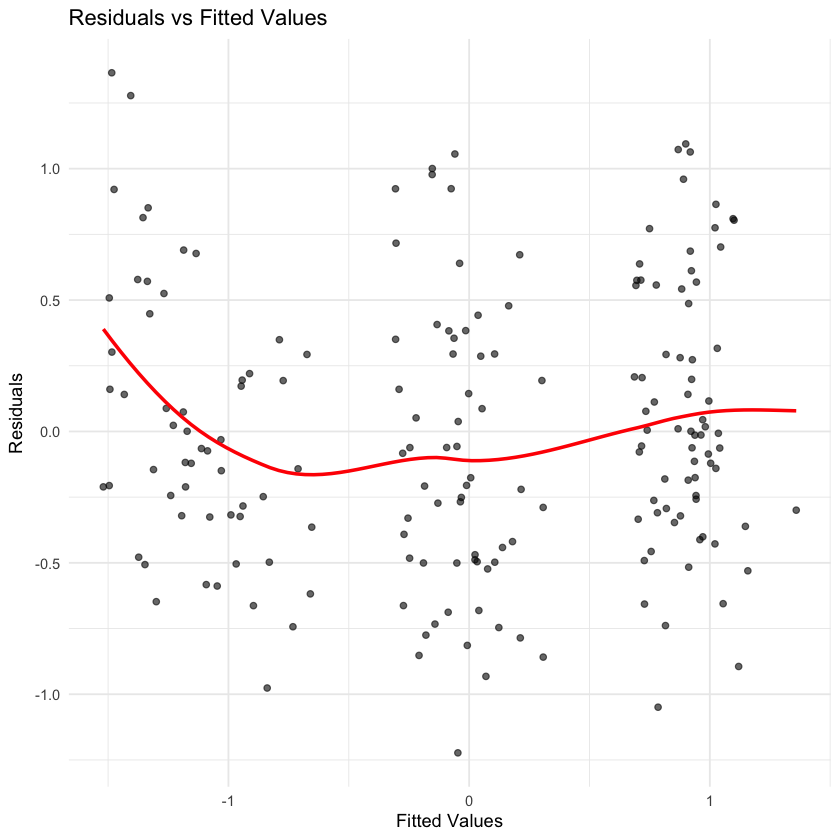

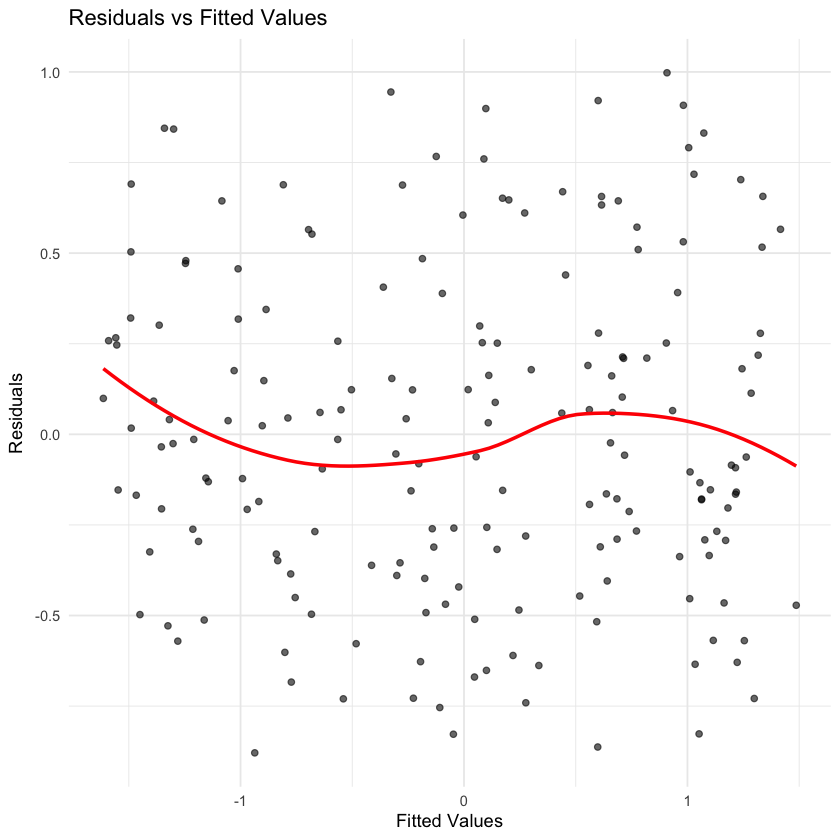

In [102]:
# Residuals vs Fitted plot (to check for homoscedasticity)
ggplot(data.frame(Fitted = fitted(scaled_model), Residuals = residuals(scaled_model)), 
       aes(x = Fitted, y = Residuals)) +
  geom_point(alpha = 0.6) +  # Scatter plot of residuals
  geom_smooth(method = "loess", se = FALSE, color = "red") +  # LOESS smoothing line
  labs(x = "Fitted Values", y = "Residuals", title = "Residuals vs Fitted Values") +
  theme_minimal()

# Residuals vs Fitted plot (to check for homoscedasticity)
ggplot(data.frame(Fitted = fitted(interaction_model_scaled), Residuals = residuals(interaction_model_scaled)), 
       aes(x = Fitted, y = Residuals)) +
  geom_point(alpha = 0.6) +  # Scatter plot of residuals
  geom_smooth(method = "loess", se = FALSE, color = "red") +  # LOESS smoothing line
  labs(x = "Fitted Values", y = "Residuals", title = "Residuals vs Fitted Values") +
  theme_minimal()


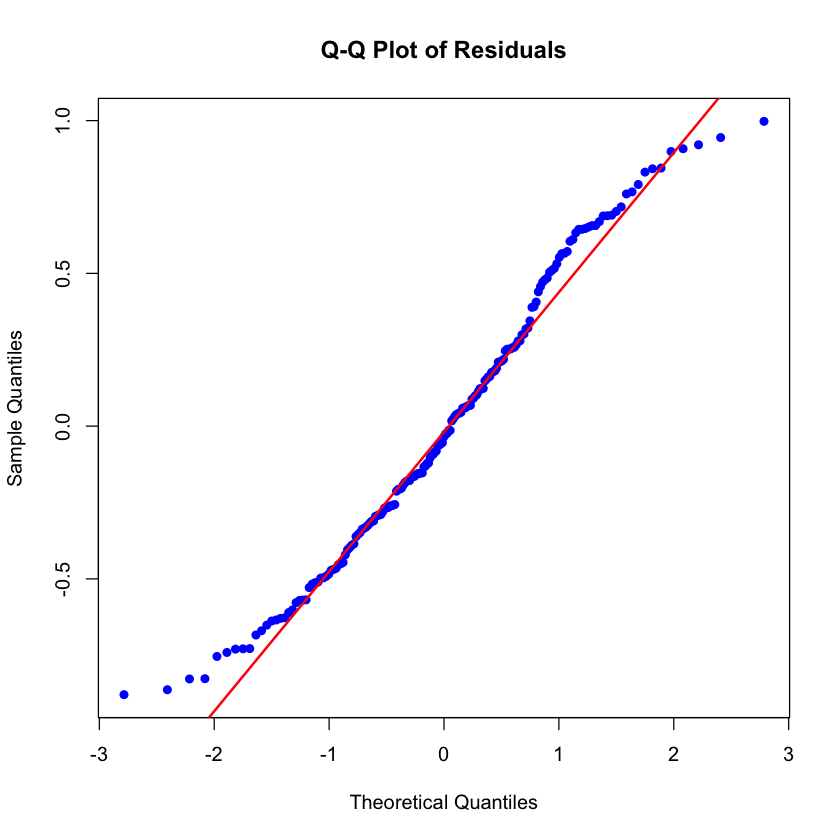

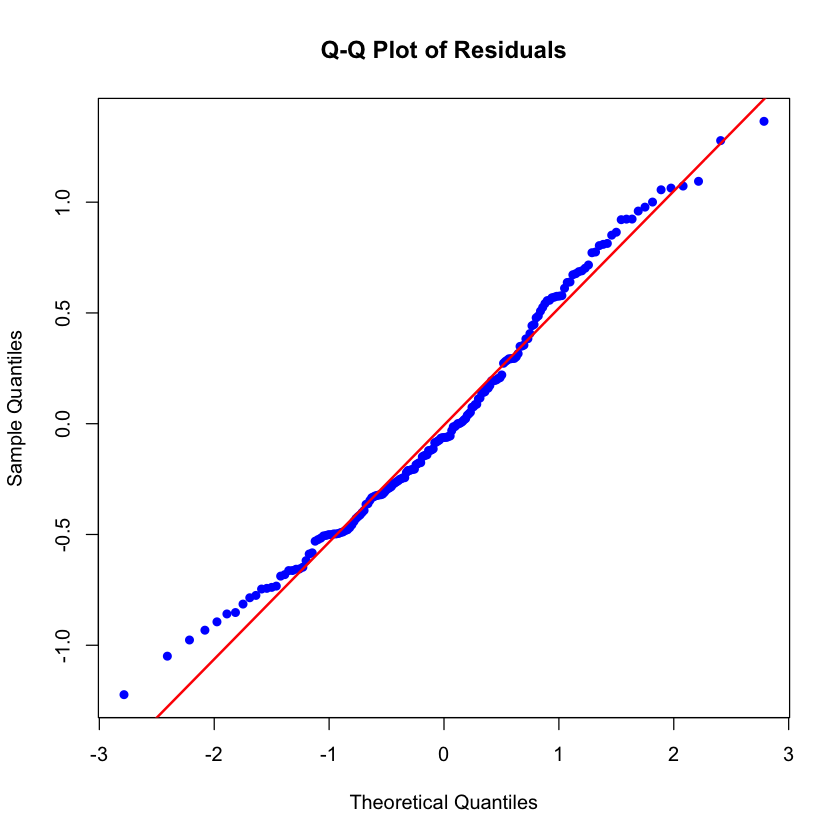

In [105]:
# Q-Q Plot 
qqnorm(residuals(interaction_model_scaled), 
       main = "Q-Q Plot of Residuals", 
       pch = 16, col = "blue")  # Use blue points and filled circles for better contrast
qqline(residuals(interaction_model_scaled), 
       col = "red", lwd = 2)  # Use a thicker red line


# Q-Q Plot 
qqnorm(residuals(scaled_model), 
       main = "Q-Q Plot of Residuals", 
       pch = 16, col = "blue")  # Use blue points and filled circles for better contrast
qqline(residuals(scaled_model), 
       col = "red", lwd = 2)  # Use a thicker red line

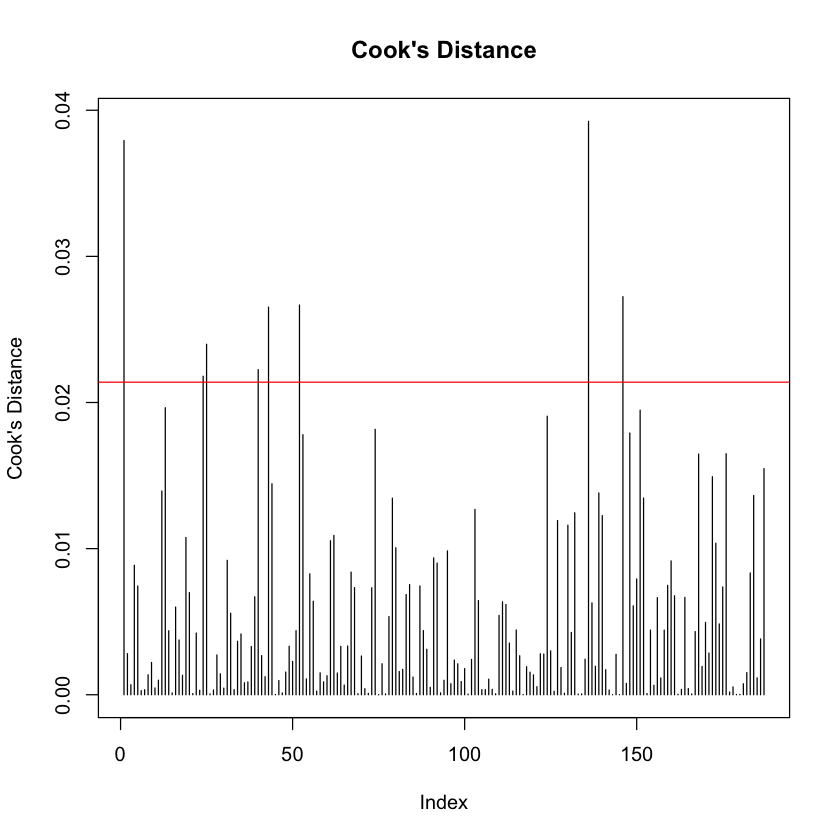

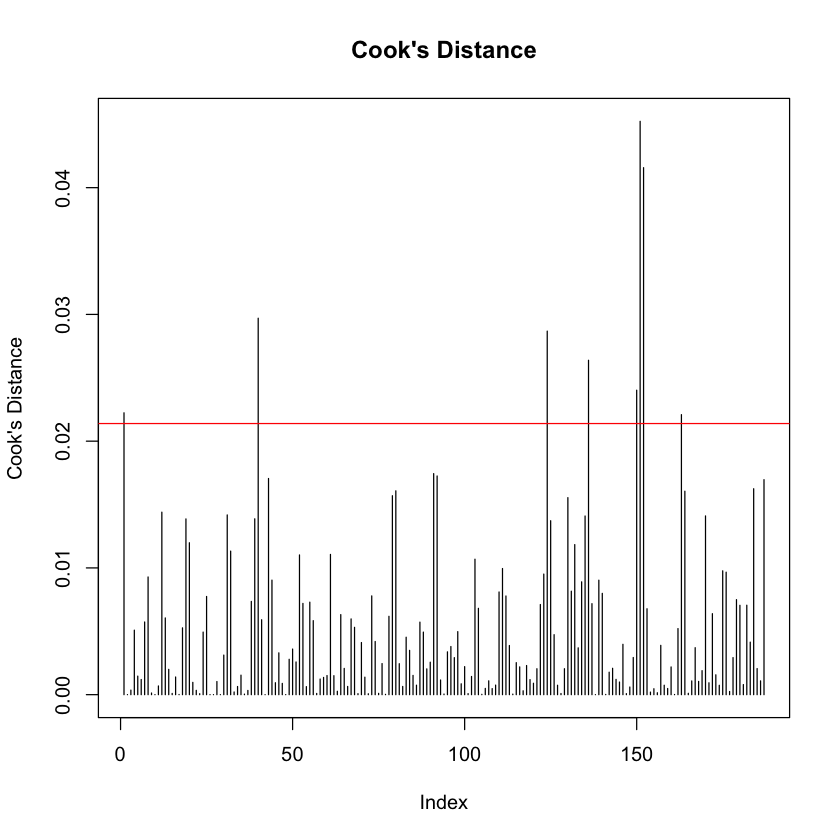

In [106]:
# Cook's Distance plot (influential points)
cooksd <- cooks.distance(interaction_model_scaled)
plot(cooksd, type = "h", main = "Cook's Distance", ylab = "Cook's Distance")
abline(h = 4 / length(cooksd), col = "red")  # threshold for influential points

# Cook's Distance plot (influential points)
cooksd <- cooks.distance(scaled_model)
plot(cooksd, type = "h", main = "Cook's Distance", ylab = "Cook's Distance")
abline(h = 4 / length(cooksd), col = "red")  # threshold for influential points

### Feature Selection Plan

1. Use correlation analysis reuslt to identify and combine highly correlated predictors.
2. Use VIF results to address multicollinearity.
3. Use Recursive Feature Elimination (RFE) or Stepwise Regression for feature selection.
4. Assess predictor importance to prioritize key variables.
5. Validate the final model on a testing set to ensure generalizability.

In [110]:
cor_matrix <- cor(data[, c("X1", "X2", "X3", "X4", "X5", "X6", "X7")])
print(cor_matrix)

vif_values <- vif(scaled_model)
print(vif_values)


           X1         X2         X3         X4         X5         X6         X7
X1  1.0000000 -0.1748124  0.4398016  0.7147372  0.3543378  0.8297108 -0.6336816
X2 -0.1748124  1.0000000  0.5838289 -0.4712233 -0.1287768 -0.3410698  0.5222030
X3  0.4398016  0.5838289  1.0000000  0.4277448  0.2197762  0.3758298 -0.1882479
X4  0.7147372 -0.4712233  0.4277448  1.0000000  0.4244978  0.8717797 -0.8378497
X5  0.3543378 -0.1287768  0.2197762  0.4244978  1.0000000  0.4877566 -0.3601852
X6  0.8297108 -0.3410698  0.3758298  0.8717797  0.4877566  1.0000000 -0.8103414
X7 -0.6336816  0.5222030 -0.1882479 -0.8378497 -0.3601852 -0.8103414  1.0000000
        X1         X2         X3         X4         X5         X6         X7 
  8.025078 654.356854 636.901239 900.368512   1.342534  80.228775   6.297752 


In [114]:
# install.packages('caret')

In [115]:
library(caret)
control <- rfeControl(functions = lmFuncs, method = "cv", number = 10)
rfe_results <- rfe(scaled_data[, c("X1", "X2", "X3", "X4", "X5", "X6", "X7")],
                   scaled_data$Y,
                   sizes = c(1:7),
                   rfeControl = control)
print(rfe_results)


Loading required package: lattice




Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables   RMSE Rsquared    MAE RMSESD RsquaredSD  MAESD Selected
         1 0.7964   0.3819 0.6697 0.1276     0.1475 0.1203         
         2 0.6070   0.6484 0.5052 0.1380     0.1359 0.1296         
         3 0.5444   0.7065 0.4550 0.1400     0.1368 0.1324         
         4 0.5415   0.7114 0.4574 0.1259     0.1224 0.1158         
         5 0.5429   0.7124 0.4581 0.1156     0.1054 0.1086         
         6 0.5273   0.7246 0.4403 0.1142     0.1005 0.1080        *
         7 0.5277   0.7231 0.4404 0.1155     0.1002 0.1081         

The top 5 variables (out of 6):
   X2, X3, X4, X6, X7



In [117]:
stepwise_model_scaled <- step(lm(Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7, data = scaled_data),
                              direction = "both", trace = FALSE)
summary(stepwise_model_scaled)



Call:
lm(formula = Y ~ X1 + X2 + X3 + X6 + X7, data = scaled_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21792 -0.36218 -0.06438  0.35770  1.35557 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.995e-14  3.888e-02   0.000 1.000000    
X1           2.823e-01  7.228e-02   3.905 0.000133 ***
X2           5.456e-01  8.219e-02   6.639 3.56e-10 ***
X3          -3.223e-01  7.729e-02  -4.170 4.72e-05 ***
X6          -3.988e-01  9.586e-02  -4.161 4.90e-05 ***
X7           2.883e-01  7.795e-02   3.699 0.000287 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5317 on 181 degrees of freedom
Multiple R-squared:  0.7249,	Adjusted R-squared:  0.7173 
F-statistic:  95.4 on 5 and 181 DF,  p-value: < 2.2e-16


In [118]:
model <- train(Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7, data = scaled_data, method = "lm")
var_importance <- varImp(model)
print(var_importance)


lm variable importance

   Overall
X7 100.000
X1  84.603
X6  37.500
X2  19.745
X3  11.700
X5   9.906
X4   0.000


***
## Model Evaluation & Validation
**Dates:** November 15 - November 21

**Meeting Date:** November 21

### Documentation of Model Adjustments

Remove X2, X3, X4 ,X6

In [119]:
set.seed(123)
train_indices <- createDataPartition(scaled_data$Y, p = 0.7, list = FALSE)
train_data <- scaled_data[train_indices, ]
test_data <- scaled_data[-train_indices, ]


In [122]:
final_model_scaled <- lm(Y ~ X1 + X5 + X7, data = train_data)  # selected features

test_predictions <- predict(final_model_scaled, newdata = test_data)
mse <- mean((test_data$Y - test_predictions)^2)
print(paste("Test MSE:", mse))


[1] "Test MSE: 0.329707606426765"


In [124]:
summary(final_model_scaled)


Call:
lm(formula = Y ~ X1 + X5 + X7, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.41796 -0.40581 -0.05852  0.42989  1.41625 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.01062    0.05621  -0.189   0.8504    
X1           0.10209    0.07428   1.374   0.1718    
X5          -0.14100    0.06085  -2.317   0.0221 *  
X7           0.80575    0.07397  10.893   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6455 on 128 degrees of freedom
Multiple R-squared:  0.6182,	Adjusted R-squared:  0.6093 
F-statistic: 69.09 on 3 and 128 DF,  p-value: < 2.2e-16


In [128]:
anova(final_model_scaled)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,29.895179,29.8951788,71.74642,4.952639e-14
X5,1,7.030188,7.0301881,16.87198,7.085668e-05
X7,1,49.440831,49.4408307,118.65467,5.896251e-20
Residuals,128,53.334827,0.4166783,NA,NA


In [129]:

# Calculate AIC and BIC for the reduced model
aic_reduced <- AIC(final_model_scaled)
bic_reduced <- BIC(final_model_scaled)

# Print AIC and BIC for the reduced model
cat("AIC - Reduced Model:", aic_reduced, "\n")
cat("BIC - Reduced Model:", bic_reduced, "\n")


AIC - Reduced Model: 264.9797 
BIC - Reduced Model: 279.3937 


`geom_smooth()` using formula = 'y ~ x'


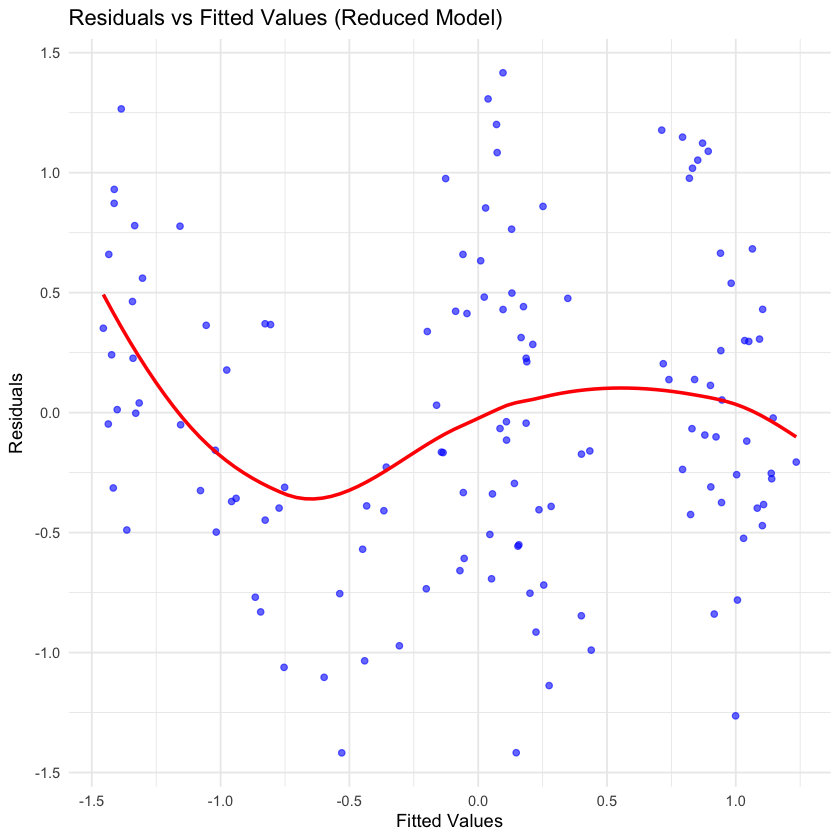

In [130]:
# Residuals vs Fitted plot for the reduced model
ggplot(data.frame(Fitted = fitted(final_model_scaled), Residuals = residuals(final_model_scaled)), 
       aes(x = Fitted, y = Residuals)) +
  geom_point(alpha = 0.6, color = "blue") +  # Scatter plot with slight transparency
  geom_smooth(method = "loess", se = FALSE, color = "red") +  # Add a LOESS smoothing line
  labs(x = "Fitted Values", 
       y = "Residuals", 
       title = "Residuals vs Fitted Values (Reduced Model)") +
  theme_minimal()


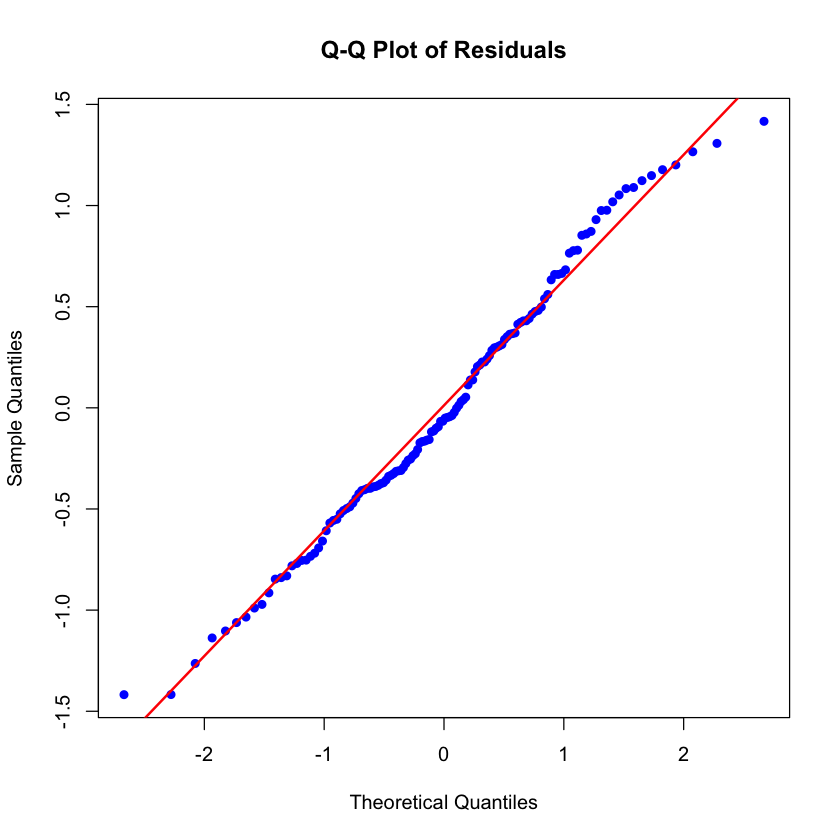

In [131]:

# Q-Q Plot 
qqnorm(residuals(final_model_scaled), 
       main = "Q-Q Plot of Residuals", 
       pch = 16, col = "blue")  # Use blue points and filled circles for better contrast
qqline(residuals(final_model_scaled), 
       col = "red", lwd = 2)  # Use a thicker red line

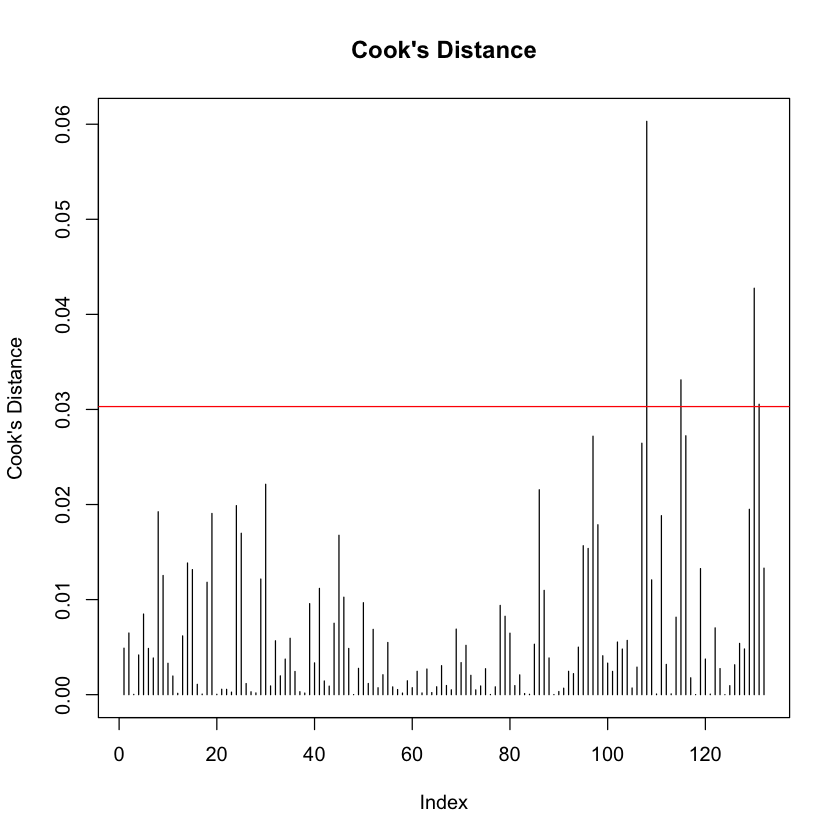

In [132]:
# Cook's Distance plot (influential points)
cooksd <- cooks.distance(final_model_scaled)
plot(cooksd, type = "h", main = "Cook's Distance", ylab = "Cook's Distance")
abline(h = 4 / length(cooksd), col = "red")  # threshold for influential points

Summary of iterative process:
1. Extract the fitted values and residuals from the model.
2. Create a scatter plot of residuals vs. fitted values:
3. Add a LOESS smoothing curve to identify patterns.
4. Look for:
Random scatter around zero (indicates homoscedasticity).
Funnel shapes or patterns (indicate heteroscedasticity).

Final Model Equation: 

### Model Evaluation
#### Significance Tests

In [ ]:
# Add your significance test code with outputs here

#### Model Performance Metrics

In [ ]:
# Add your model performance code with outputs here

### Validation Findings

In [ ]:
# Add any validation code here

### Summary of Findings

[Summarize your findings from the model evaluation and validation here. Don't forget to bring it back to your hypothesis and include your final model!]

***
Team Reminder: After this meeting, agree on a report/presentation format and make all of the needed documentation.

***
## Report and Presentation
**Dates:** November 22 - November 26

**Meeting Date:** November 26, 4:30

No code neccesary here (yay)! Use the space below to brainstorm which graphs you want to include in the report and how you want to tell the story of your model!